# Data Visualization

Why data visualization?
- Gain insight into an information space by mapping data onto graphical primitives
- Provide qualitative overview of large data sets
- Search for patterns, trends, structure, irregularities, relationships among data
- Help find interesting regions and suitable parameters for further quantitative analysis


This section aims to show the use of ```matplotlib``` for data visualization. In addition, the use of ```seaborn``` will improve the visualization quality in term of the design.


In [53]:
import matplotlib.pyplot as plt #import the matplotlib
%matplotlib inline 
import numpy as np
import pandas as pd

In [54]:
data = pd.read_csv('data/diamonds.csv') 

In [55]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [56]:
data['carat'].value_counts()

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
2.70       1
3.67       1
5.01       1
2.77       1
3.40       1
Name: carat, Length: 273, dtype: int64

In [57]:
table = data['cut'].value_counts()

In [58]:
table

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

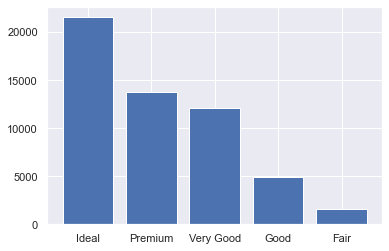

In [59]:
plt.bar(table.index,table) #bar chart x, y
plt.show()

Although the result contains all the information we would like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.


Now let's take a look at how it works with Seaborn.
As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [60]:
import seaborn as sns
sns.set()

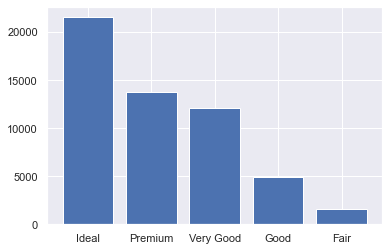

In [61]:
plt.bar(table.index,table)
plt.show()

In [62]:
# Seaborn embedded dataset
iris = sns.load_dataset("iris")

<img src="figures/[03-02]_Figure_03_Iris.png">

In [63]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [64]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


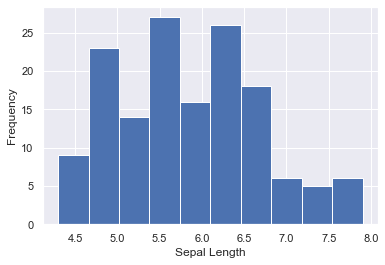

In [65]:
plt.hist(iris['sepal_length'], bins = 10) #histogram with bins (class interval) = 10 (equals part)
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.show()
# sepal : 꽃받침 petal : 꽃잎

In [66]:
import matplotlib.pyplot as plt

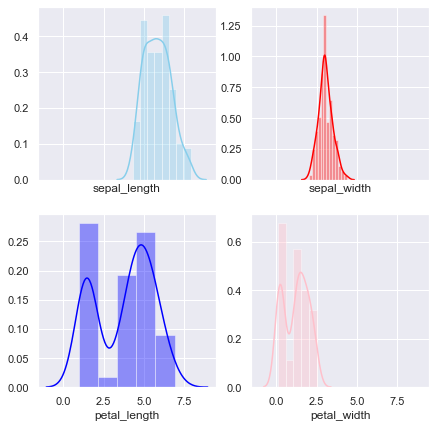

In [67]:
f, axes = plt.subplots(2,2, figsize=(7,7), sharex=True)
sns.distplot(iris["sepal_length"],color = "skyblue",ax = axes[0,0])
sns.distplot(iris["sepal_width"],color = "red",ax = axes[0,1])
sns.distplot(iris["petal_length"],color = "blue",ax = axes[1,0])
sns.distplot(iris["petal_width"],color = "pink",ax = axes[1,1])                                      

## Learning Check!

What is the different between Bar Chart and Histogram?

Bar Chart:
Best used for:
- Reading numbers accurately from the chart
- Comparing individual bars to each other
- Exploring overall trends across categories
- Data: One (or more) text (categorical) variable
- Data: One numerical variable

Histogram:
- Best used for
- To show the density and distribution of continuous numerical data.  Note, that bar charts plots categorical data
- Data: One continuous numerical variable


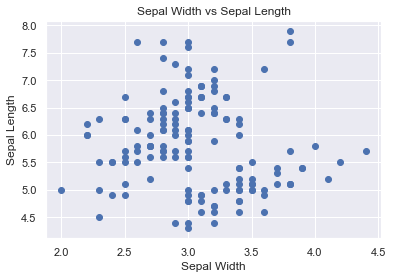

In [68]:
plt.scatter(iris['sepal_width'], iris['sepal_length']) #scatter plot with x = sepal_width and y = sepal_length
plt.title("Sepal Width vs Sepal Length")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()

Scatter Plot

Best used for
- Showing how one variable affects the other, or for showing precise, data dense visualizations, correlations, and clusters between two variables.
- Data: Two numerical variables  
- When a third numerical variable can be added to create a bubble chart.  The third variable changes the size of the dots. 

Text(0.5, 1.0, 'Bubble Plot with Matplotlib')

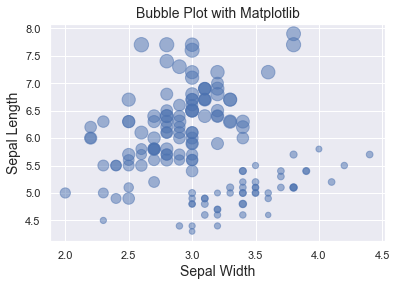

In [69]:
plt.scatter(iris['sepal_width'], iris['sepal_length'], 
             s=iris['petal_length']*30, alpha = 0.5) # alpha : 투명도, s: marker size by group
plt.xlabel("Sepal Width", size=14)
plt.ylabel("Sepal Length", size=14)
plt.title("Bubble Plot with Matplotlib", size=14)

Text(0.5, 1.0, 'Bubble Plot with Matplotlib')

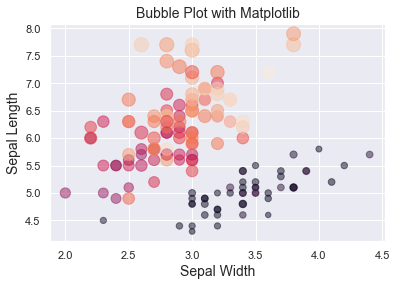

In [70]:
plt.scatter(iris['sepal_width'], iris['sepal_length'], 
             s=iris['petal_length']*30, 
            c= iris['petal_width'], # c: marker color by group
              alpha = 0.5)
plt.xlabel("Sepal Width", size=14)
plt.ylabel("Sepal Length", size=14)
plt.title("Bubble Plot with Matplotlib", size=14)

In [71]:
#delete one column for building boxplot with only continuous variable
newIris = iris.drop("species", axis = 1) # axis = 1 : column

In [72]:
newIris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


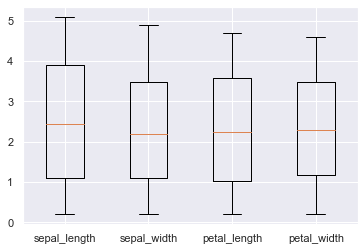

In [73]:
plt.boxplot(newIris[:4], labels = newIris.columns)
plt.show()
# label : 어떤 column 사용할 지 적어줌
# data이름[:사용할 column의 개수, 즉 label의 개수 적어붐]

ValueError: Dimensions of labels and X must be compatible

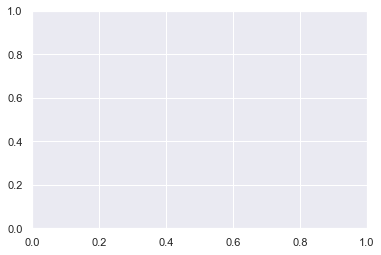

In [74]:
plt.boxplot(newIris[:2], labels = newIris.columns)
plt.show()

Boxplot: graphic display of five-number summary

- Quartiles: Q1 (25th percentile), Q3 (75th percentile)
- Inter-quartile range: IQR = Q3 – Q1 
- Five number summary: min, Q1, median, Q3, max
- Boxplot: ends of the box are the quartiles; median is marked; add whiskers, and plot outliers individually
- Outlier: usually, a value higher/lower than 1.5 x IQR


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

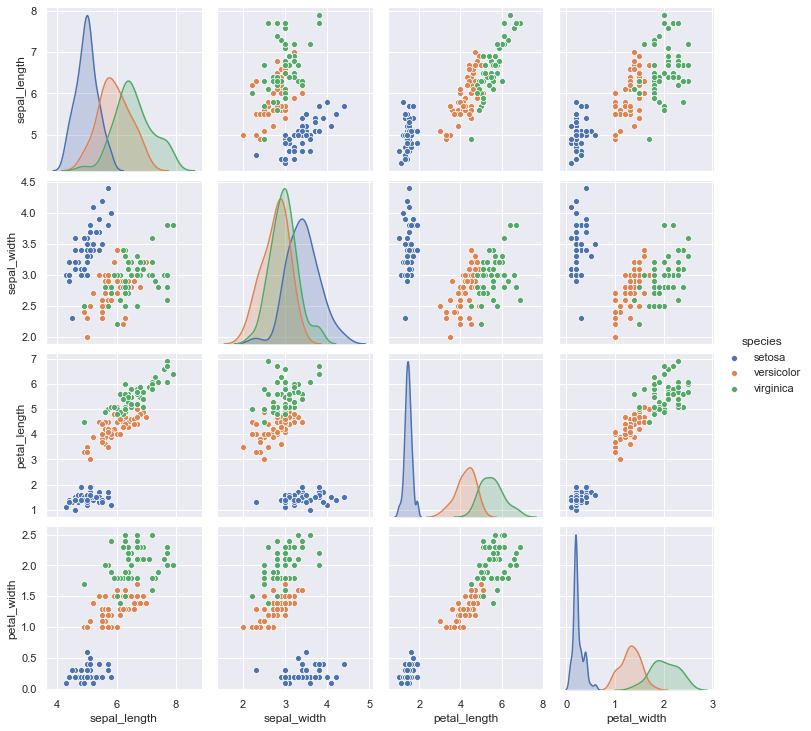

In [75]:
sns.pairplot(iris, hue='species', height=2.5); #the pairplot is colored based on the species

The function ``corr()`` is to get the correlation among the numerical (continuous) data variables. Using the heatmat, we can see all the correlations among the 4 attributes in iris dataset.

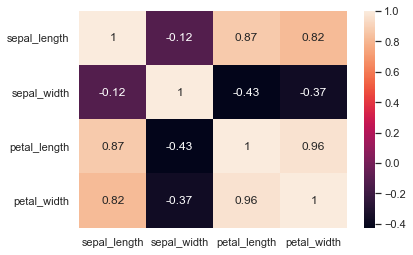

In [76]:
sns.heatmap(iris.corr(), annot=True) # annotation :각 셀의 값을 표시할지 결정하는 것

Heat Map

Best used for
- Showing general trends
- Data:
  - Data grid of two numerical or categorical variables
  - Third variable is (often the number of data points associated with the particular row and column) is encoded as the colour of the cell.

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [78]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [79]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [80]:
tips.describe(include ='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


Description
- One waiter recorded information about each tip he received over a period of a few months working in one restaurant. He collected several variables:
- A data frame with 244 rows and 7 variables

Details
- total_bill: bill in dollars,
- tip: tip in dollars,
- sex: sex of the bill payer (F/M),
- smoker: whether there were smokers in the group,
- day: day of the week (Sun, Sat, Fri, Thu),
- time: time of day (Dinner, Lunch),
- size: size of the party (2 - 6 person).

Let's make a new column, named "tip_percent" to indicate the percentage of the tips

In [81]:
#inserting a new column with a formula
tips['tip_percent'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


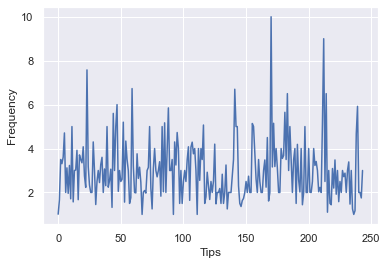

In [82]:
#showing the tips in a time series with plot
plt.plot(tips['tip'])
plt.xlabel("Tips")
plt.ylabel("Frequency")
plt.show()

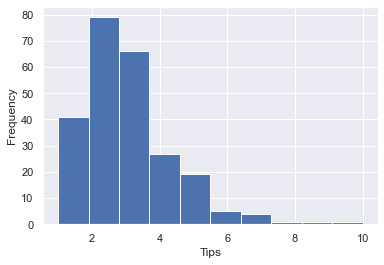

In [83]:
#showing the distribution of the tips with histogram
plt.hist(tips['tip'], bins = 10)
plt.xlabel("Tips")
plt.ylabel("Frequency")
plt.show()

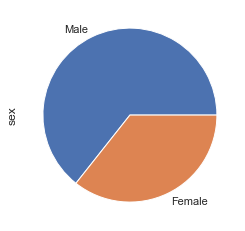

In [84]:
#check the proportion of the female and male using pie chart
tips['sex'].value_counts().plot(kind='pie') 

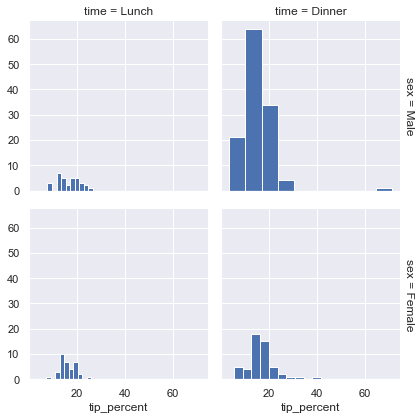

In [85]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
# FacetGrid : 다중 시각화
grid.map(plt.hist, "tip_percent"); 

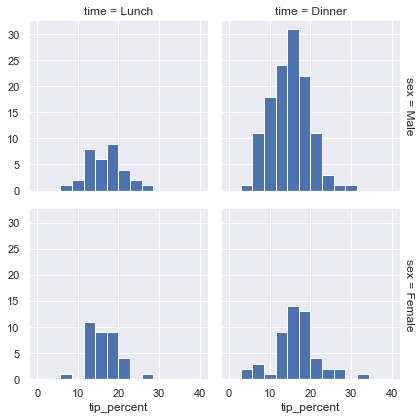

In [86]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_percent", bins=np.linspace(0, 40, 15)); #bins=np.linspace(0, 40, 15) -> 0부터 40까지 15개의 요소로 만들어라

### Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

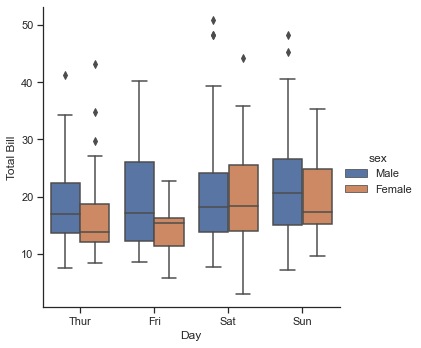

In [87]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

# Summary

This section discusses the Basic Data Visualization using Matplotlib and Seaborn Library.